**In this notebook we transform the German "DeFaktS" dataset to use it in our standardized classification pipeline and gain so insights into the dataset**

In [2]:
#load libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load jsonl data
with open("DefaktS_Twitter_DS.jsonl", "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df

,id,text,Comments,DateTime,Hashtags,Language,Username,LikeCount,QuoteCount,ReplyCount,Unnamed: 0,RetweetCount,binary_label,span_labels
0,378394,Abtreibung ist nach der 13ten Wo. gleichbedeut...,[],1675709886000,None,de,u1,1,0,0,0,0,1.0,"[[0, 10, corpkeyword], [0, 10, psychemo], [0, ..."
1,378395,"In #England, #Wales, #Schottland, #Frankreich,...",[],1675701008000,"['England', 'Wales', 'Schottland', 'Frankreich...",de,u2,9,0,1,1,5,0.0,"[[0, 72, catneutral], [73, 145, catneutral], [..."
2,378396,Wie wahr; Die EU fördert statt Kinder und Fami...,[],1675695682000,None,de,u3,0,0,0,2,0,1.0,"[[0, 70, infonewinfo], [0, 70, psychabas], [70..."
3,378397,"Gegen Abtreibung, Ehe nur zwischen Mann und Fr...",[],1675695415000,"['AfD', 'Kirchen']",de,u4,3,0,1,3,0,0.0,"[[0, 81, catneutral], [6, 16, corpkeyword], [8..."
4,378398,"News: Spionage-Ballons, China, Robert Habeck, ...",[],1675685642000,None,de,u5,0,0,0,4,0,0.0,"[[0, 80, catneutral], [81, 124, catneutral], [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105850,479941,Beerdigung der Queen und Oktoberfest am selben...,[],1663615534000,"['queensfuneral', 'QueenElizabeth', 'wiesn2022']",de,u40161,0,0,0,177,0,NaN,"[[110, 124, corpkeyword]]"
105851,480388,"Sieh dir diesen Post an: ""1000 Leichen indigen...",[],1663332405000,"['QueenElizabeth', 'Indigene', 'TagdesFriedhof...",de,u1799,0,0,0,624,0,NaN,"[[120, 134, corpkeyword]]"
105852,470068,Mit „Grundlagen der europäischen Migrationspol...,[],1675463744000,None,de,u26182,2,0,0,319,0,NaN,"[[74, 88, corpkeyword]]"
105853,382881,Und 2007 eröffnete die damalige Bundeskanzleri...,[],1674050079000,['IGW'],de,u44486,0,0,0,487,0,NaN,"[[32, 45, corpkeyword], [57, 70, corpkeyword],..."


In [4]:
#keep only relevant columns
df = df[["text", "binary_label"]].rename(columns={
    "binary_label": "Label"
})

# Filter valid labels & convert to int
df = df[df["Label"].notna()].copy()       # only keep datapoints with labels
df["Label"] = df["Label"].astype(int)     # cast to int (0,1)

df.describe

<bound method NDFrame.describe of                                                     text  Label
0      Abtreibung ist nach der 13ten Wo. gleichbedeut...      1
1      In #England, #Wales, #Schottland, #Frankreich,...      0
2      Wie wahr; Die EU fördert statt Kinder und Fami...      1
3      Gegen Abtreibung, Ehe nur zwischen Mann und Fr...      0
4      News: Spionage-Ballons, China, Robert Habeck, ...      0
...                                                  ...    ...
20003  World War Two | 199 - Kursk: Soviets Dig-In fo...      0
20004  THEO VAN GOGH WATCH: ALLSEITIGE INTENSIVE VORB...      1
20005  World War Z\nmodern era version https://t.co/D...      0
20006                            Verga, amo World War Z.      0
20007  Die Diskussion um das Cochrane Maskenreview ni...      1

[20008 rows x 2 columns]>

In [5]:
# Save as CSV for pipeline compatibility
df.to_csv("defakts_binary.csv", index=False)

print("CSV created:", df.shape)
print(df.head())

CSV created: (20008, 2)
                                                text  Label
0  Abtreibung ist nach der 13ten Wo. gleichbedeut...      1
1  In #England, #Wales, #Schottland, #Frankreich,...      0
2  Wie wahr; Die EU fördert statt Kinder und Fami...      1
3  Gegen Abtreibung, Ehe nur zwischen Mann und Fr...      0
4  News: Spionage-Ballons, China, Robert Habeck, ...      0


**some statistics and visuals to gain insight**

In [6]:
# Label distribution
label_counts = df["Label"].value_counts(normalize=True) * 100
print("\nLabel distribution (%):\n", label_counts)

# Average length (words) per text
df["TextLength"] = df["text"].apply(lambda x: len(str(x).split()))
print("\nOverall TextLength stats:\n", df["TextLength"].describe())


Label distribution (%):
 Label
0    58.856457
1    41.143543
Name: proportion, dtype: float64

Overall TextLength stats:
 count    20008.000000
mean        23.842413
std         11.264493
min          1.000000
25%         14.000000
50%         24.000000
75%         33.000000
max         58.000000
Name: TextLength, dtype: float64


C:\Users\tdoro\AppData\Local\Temp\ipykernel_11416\3695397447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Label", data=df, palette=["gray","steelblue"])
C:\Users\tdoro\AppData\Local\Temp\ipykernel_11416\3695397447.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["real (0)", "fake (1)"])


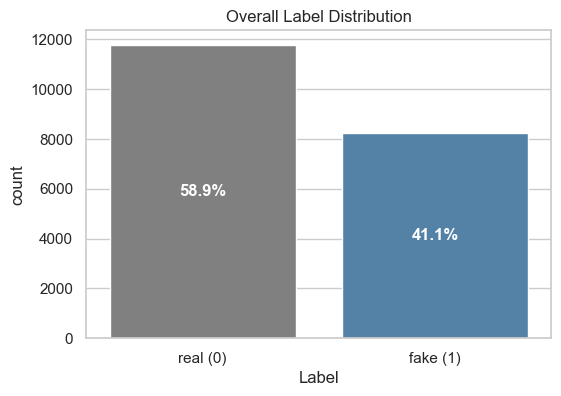

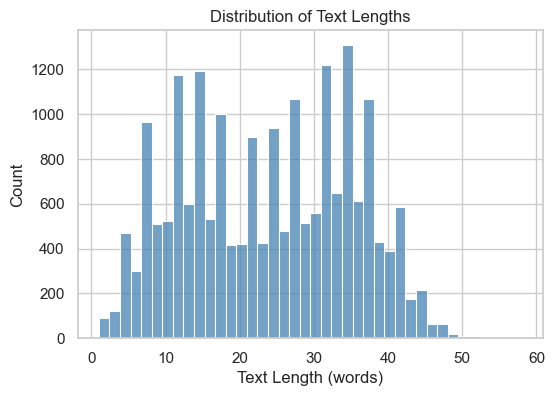

In [8]:
#Visualizations
sns.set(style="whitegrid")

#Label distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Label", data=df, palette=["gray","steelblue"])


for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(df):.1f}%"
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',
                color="white", fontsize=12, fontweight="bold")


ax.set_xticklabels(["real (0)", "fake (1)"])

plt.title("Overall Label Distribution")
plt.show()



#Text length distribution
plt.figure(figsize=(6,4))
sns.histplot(df["TextLength"], bins=40, kde=False, color="steelblue")
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (words)")
plt.ylabel("Count")
plt.show()

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import torch.nn as nn

from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)

root_path = Path.cwd().parents[1]  #go to root
sys.path.append(str(root_path))
from src.evaluation_visualization import (
    plot_learning_curves,
    plot_confusion_matrix,
    plot_roc_and_pr_curves,
    plot_threshold_curves,
    extended_classification_report,
    get_metrics_dict,
    quick_f2_score_default_threshold,
    plot_skorch_history
)

from sklearn.dummy import DummyClassifier
from joblib import dump
from src.preprocessing import process_file
from src.optimize_threshold import (
    optimize_threshold_with_cv,
    get_threshold_evaluation_data,
    get_threshold_evaluation_data_cv
)
from src.optuna_optimizer import (
    optimize_with_optuna_tpe,
    sample_class_weight_value,
    grid_search_with_optuna
)
from src.optuna_visualizations import (
    plot_optuna_study_analysis,
    quick_optuna_analysis
)

from src.phrase_transformer import PhraseDetector

# Load and preprocess data (basic mode)
df_advancedcleaned = process_file(
    filepath=f'defakts_binary.csv',
    file_format='csv',
    text_key='text', 
    mode='advanced'  # basic cleaning mode
)
df_advancedcleaned

c:\Users\tdoro\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,text,Label
0,abtreib ten gleichbedeut mord wer danach abtre...,1
1,england wal schottland frankreich norweg spani...,0
2,wahr eu fordert statt kind famili abtreib lbgt...,1
3,abtreib ehe mann frau imm wirbt afd position c...,0
4,news spionageballon china robert habeck olaf s...,0
...,...,...
20003,world two kursk soviet digin for blitzkrieg ww...,0
20004,theo van gogh watch allseit intensiv vorbereit...,1
20005,world mod era version,0
20006,verga amo world,0
